In [1]:
import random as r

#visuals
import matplotlib.pyplot as plt


In [22]:
#gives us a random float within the range of 10 and -10
def randfloat():
    return r.randint(-100,100)/100

#mushRoom Class
class MushRoom:
    def __init__(self):
        #wet
        self.Hum = 50
        self.TooHum = 90
        self.TooDry = 20
        
        #C02
        self.CO2 = 30
        self.TooCO2 = 50
        self.FewCO2 = 5
        
        #Temp
        self.Temp = 90
        self.Hot = 110
        self.Cold = 75    
    
    ###FUNCTIONS
    #Fan Reduces Humity
    #CO2 and Temp
    def Fan(self):
        self.Hum-=1
        self.CO2-=1
        self.Temp-=1
    
    #Sprayer increases Humity
    def Spray(self):
        self.Hum+=1
        
    #Heater increases heat
    def Heater(self):
        self.Temp+=1
        
    
        
        


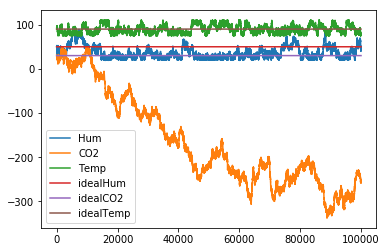

In [25]:
#water/humidity --- (Fan reduces water we assume, spray increase)
#CO2 -- (Fan reduces CO2, we assume it goes up constantly )
#Heat -- (Fan cools, Heater heats)

m = MushRoom()

#we will play this for a certain amount of time

r.seed(0)

time = range(100000)

HumHist = []
CO2Hist = []
TempHist = []

for t in time:
    
    #let nature do its thing
    m.Hum+=randfloat()
    m.CO2+=randfloat()
    m.Temp+=randfloat()
    
    #assume C02 rises at some rate
    #m.CO2+=1
    
    ####check conditions
    
    #check Hum
    if m.Hum > m.TooHum:
        m.Fan()
    
    if m.Hum < m.TooDry:
        m.Spray()
        
    #check CO2
    if m.CO2 > m.TooCO2:
        m.Fan()
    
    if m.CO2 < m.FewCO2:
        #we dont have something for this
        pass 
    
    #check Temp
    if m.Temp > m.Hot:
        m.Fan()
    
    if m.Temp < m.Cold:
        m.Heater()
    
    
    HumHist.append(m.Hum)
    CO2Hist.append(m.CO2)
    TempHist.append(m.Temp)
    

idealHum = 50
idealCO2 = 30
idealTemp = 90


#over time
plt.plot(time, HumHist)
plt.plot(time, CO2Hist)
plt.plot(time, TempHist)

#ideal
plt.plot(time, [idealHum]*len(time))
plt.plot(time, [idealCO2]*len(time))
plt.plot(time, [idealTemp]*len(time))

plt.legend(['Hum', 'CO2', 'Temp', 'idealHum', 'idealCO2', 'idealTemp'])#, loc='upper left')

plt.show()


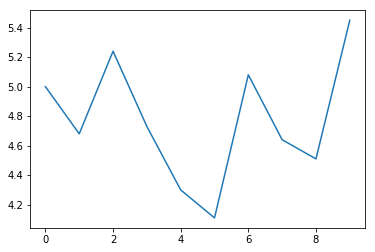

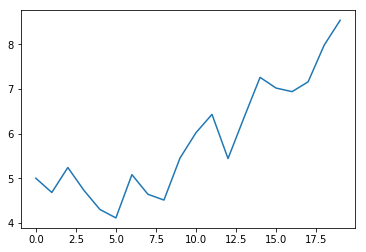

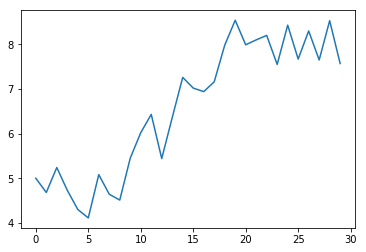

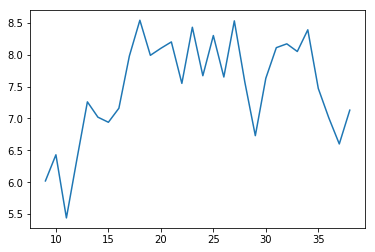

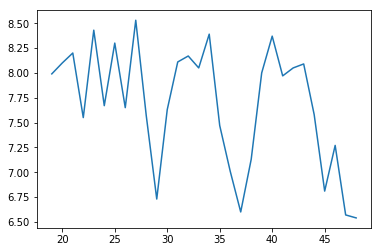

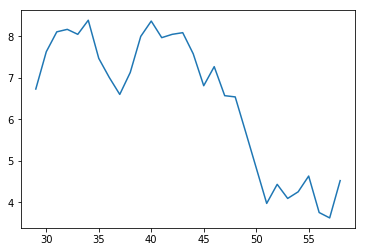

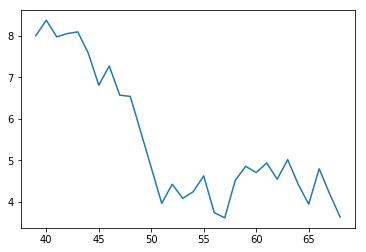

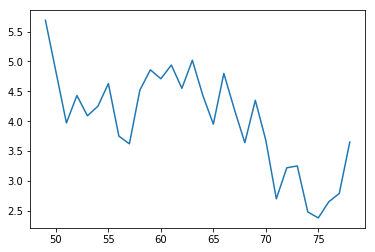

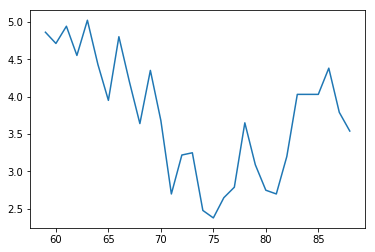

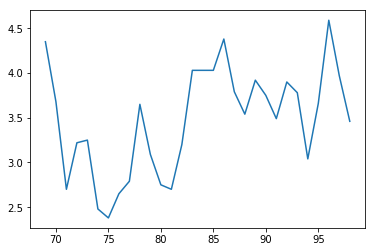

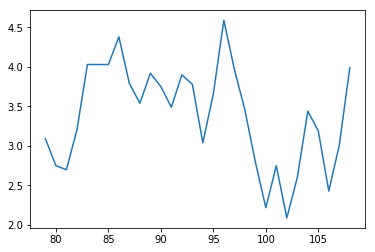

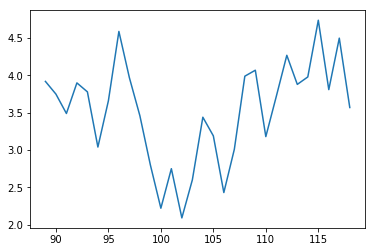

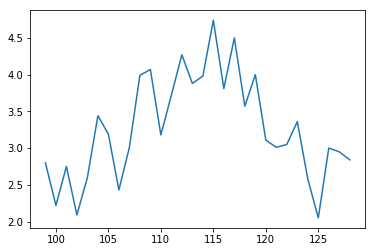

KeyboardInterrupt: 

In [39]:
import time as ti


time = range(10000)

AHist = []
A = 5

w = 30
for t in time:
    AHist.append(A)
    A+=randfloat()
    
    if (t+1)%10==0:
        plt.clf()
        if t<w:
            plt.plot(time[:t+1], AHist)
        else:
            plt.plot(time[t-w:t], AHist[t-w+1:])
        plt.show()
        ti.sleep(3)
        
        
    

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

# generate test data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.scatter(x, y, z)
ax.view_init(20, 40)
# show plot
plt.show()

def update_plot(angle1 = 20, angle2 = 40):
    # set view angle
    ax.view_init(angle1, angle2)
    fig.canvas.draw_idle()

# prepare widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 60)
angle1_label = widgets.Label(value = 'Angle 1 value is: ' + str(angle1_slider.value))
display(angle1_slider, angle1_label)

# handle angle 1 update
def update_angle1(value):
    update_plot(angle1 = value['new'])
    angle1_label.value = 'Angle 1 value is: ' + str(value.new)

angle1_slider.observe(update_angle1, names = 'value')

<IPython.core.display.Javascript object>

IntSlider(value=20, max=60)

Label(value='Angle 1 value is: 20')